# CreditScoring Model
### Develop a credit scoring model to predict the creditworthiness of individuals based on historical financial data. Utilize classification algorithms and assess the model's accuracy.

**BASED ON BANK CREDIT SCORING IF THE PERSON GET LOAN APPROVAL OR NOT**

In [1]:
#Importing The Required Libraries
import pandas as pd
# import seaborn as sns
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
# ConfusionMatrixDisplay


In [2]:
from pathlib import Path
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kapturovalexander/bank-credit-scoring")
dataset_path = Path(path).joinpath("bank.csv")

df = pd.read_csv(dataset_path, sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# **PREPROCESSING**

In [3]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Countplot for categorical features

In [5]:
lst=["job","marital","education","default","housing","housing","loan","contact","month","poutcome","y"]
le=LabelEncoder()
for i in lst:
    df[i]=le.fit_transform(df[i])

In [6]:
df.rename(columns={"y": "loan_approval"}, inplace=True)

In [7]:
x = df.drop(columns=["loan_approval"], axis=1, inplace=False)
y = df[["loan_approval"]]

In [8]:
from imblearn.over_sampling import RandomOverSampler

sm=RandomOverSampler()
x_res_dp, y_res_dp =sm.fit_resample(x,y)

In [9]:
#minmaxscaler
ms=MinMaxScaler()
X_res_scaled_dp = ms.fit_transform(x_res_dp)
x_scaled_og =ms.fit_transform(x)

In [10]:
#splitting to test and train data
X_train, X_test, y_train, y_test=train_test_split(
    X_res_scaled_dp, y_res_dp, test_size=0.2, random_state=42,
    stratify=y_res_dp, shuffle=True
)

In [11]:
x_train_og, x_test_og, y_train_og, y_test_og = train_test_split(
    x_scaled_og, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)

# **MODEL IMPLIMENTATION**

In [12]:
knn1=KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='distance')
knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88       800
           1       0.82      1.00      0.90       800

    accuracy                           0.89      1600
   macro avg       0.91      0.89      0.89      1600
weighted avg       0.91      0.89      0.89      1600



In [13]:
y_test_og.value_counts()[0], y_test_og.value_counts()[1]

(np.int64(801), np.int64(104))

In [14]:
print(classification_report(y_test_og, knn1.predict(x_test_og)))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88       801
           1       0.37      1.00      0.54       104

    accuracy                           0.81       905
   macro avg       0.69      0.89      0.71       905
weighted avg       0.93      0.81      0.84       905



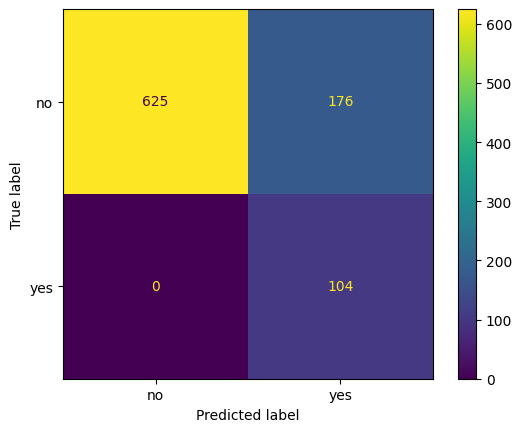

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(
    confusion_matrix(y_test_og, knn1.predict(x_test_og)),
    display_labels=["no", "yes"]
).plot()

In [ ]:
sv=SVC(C=10, gamma =1, kernel= 'rbf')
sv.fit(X_train,y_train)
y_pred2=sv.predict(X_test)
y_pred2

In [ ]:
print(classification_report(y_test,y_pred2))

In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred2=nb.predict(X_test)


In [ ]:
print(classification_report(y_test,y_pred2))

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=10)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)


In [ ]:
print(classification_report(y_test,y_pred3))

In [ ]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 4,n_estimators= 200)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)


In [ ]:
print(classification_report(y_test,y_pred4))


HIGEST VALE IS .98 ACCURACY IN **Random Forest Classifier**

## RNN Approch
### LSTM:
LSTM (Long Short-Term Memory) is a type of Recurrent Neural Network (RNN). Both LSTM and traditional RNNs are neural network architectures designed for processing sequences of data. They are particularly well-suited for tasks involving sequential or time-dependent patterns, such as time series analysis, natural language processing, and speech recognition.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data for LSTM (assuming you have a time series dataset)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model with a specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test_lstm, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')
